In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import glob
import torchvision.transforms as transforms
#import cv2 as cv

os.chdir('/Users/ethanpickering/Downloads/Archive/')

In [11]:
class ChickenDataset(Dataset):

    def __init__(self, x, y):
        self.n_samples = y.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = x # size [n_samples, n_features (pixels x pixels)]
        self.y_data = y # size [n_samples, n_features (pixels x pixels)]        
        
    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [ ]:
path = glob.glob("*.jpg")

#t_img = torch.empty((10, 1, 1080, 1920))
t_img = torch.empty((999, 1, 216, 384))

#t_img = torch.empty((10, 1, 27, 32))
#t_img = torch.empty((10, 1, 60, 60))
y_img = torch.empty((999, 1))
j = 0
for img in path:
    n = cv2.imread(img)
    n = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
    r1 = n[:,:,0] # get 1 channel
    r1 = cv2.resize(r1, None, fx=1/ds_x, fy=1/ds_y)
    t1 = transform(r1)
    t_img[j,:,:,:] = t1
    y_img[j,:] = 1
    j = j+1
    #n x 1 x px x py
    
plt.imshow(t_img[2,0,:,:])
print(t_img.shape)
print(t_img.shape)

#t_img_test = torch.empty((50, 1, 216, 384))
#y_img_test = torch.empty((50, 1))

t_img_test = t_img[949:998,:,:,:]
y_img_test = y_img[949:998,:]

plt.imshow(t_img_test[2,0,:,:])

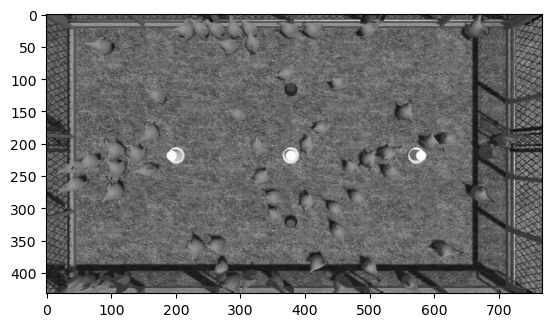

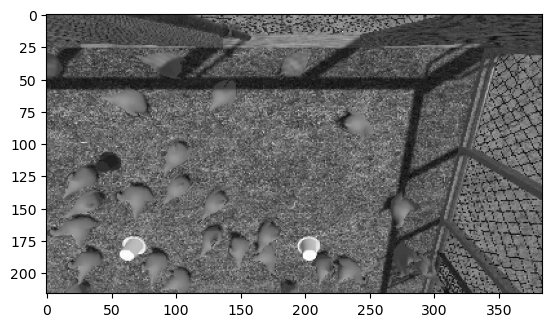

torch.Size([1, 216, 384])
torch.Size([1, 432, 768])


In [61]:
ds_x = 5
ds_y = 5
transform = transforms.Compose([
    transforms.ToTensor()
])

n = cv2.imread('./cam1/cam1_2000.jpg')
n = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
r1 = n[:,:,0] # get 1 channel
r1 = cv2.resize(r1, None, fx=1/ds_x, fy=1/ds_y)
t1 = transform(r1)
cam1 = t1

n = cv2.imread('./cam2/cam2_2000.jpg')
n = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
r1 = n[:,:,0] # get 1 channel
r1 = cv2.resize(r1, None, fx=1/ds_x, fy=1/ds_y)
t1 = transform(r1)
cam2 = t1

n = cv2.imread('./cam3/cam3_2000.jpg')
n = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
r1 = n[:,:,0] # get 1 channel
r1 = cv2.resize(r1, None, fx=1/ds_x, fy=1/ds_y)
t1 = transform(r1)
cam3 = t1

n = cv2.imread('./cam4/cam4_2000.jpg')
n = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
r1 = n[:,:,0] # get 1 channel
r1 = cv2.resize(r1, None, fx=1/ds_x, fy=1/ds_y)
t1 = transform(r1)
cam4 = t1

ds_x = 2.5
ds_y = 2.5
n = cv2.imread('./mainCam/mainCam_2000.jpg')
n = cv2.cvtColor(n, cv2.COLOR_BGR2RGB)
r1 = n[:,:,0] # get 1 channel
r1 = cv2.resize(r1, None, fx=1/ds_x, fy=1/ds_y)
t1 = transform(r1)
main_cam = t1

plt.imshow(main_cam[0,:,:])
plt.show()
main_cam.shape

plt.imshow(cam4[0,:,:])
plt.show()

print(cam4.shape)
print(main_cam.shape)

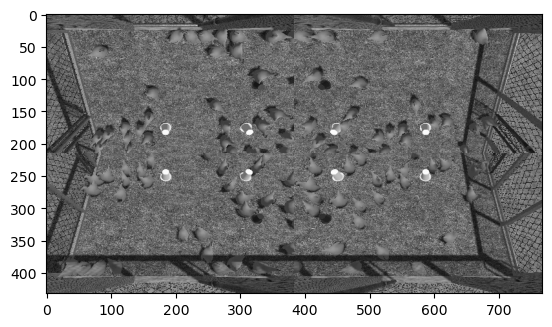

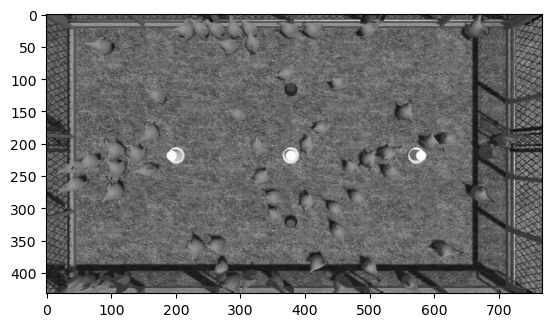

In [64]:
cam1.shape
dim_1 = 216
dim_2 = 384
cams = torch.empty((1, 1, 2*dim_1, 2*dim_2))
cams[0,0,dim_1:dim_1*2,0:dim_2] = cam1
cams[0,0,0:dim_1,0:dim_2] = cam2
cams[0,0,0:dim_1,dim_2:dim_2*2] = torch.flip(cam3, [1])
cams[0,0,dim_1:dim_1*2,dim_2:dim_2*2] = torch.flip(cam4, [1])
plt.imshow(cams[0,0,:,:])
plt.show()

top = torch.empty((1, 1, dim_1*2, dim_2*2)) #432 x 768
top[0,0,:,:] = main_cam
plt.imshow(top[0,0,:,:])
plt.show()


In [65]:
dataset = ChickenDataset(cams, top)
# Ok, now we have the dataset set up. Lets see if we can recreate the training
data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                          batch_size=1,
                                          shuffle=True)

tensor([[[0.2000, 0.2353, 0.2392,  ..., 0.2863, 0.2706, 0.2745],
         [0.3529, 0.3569, 0.3765,  ..., 0.1294, 0.0471, 0.2039],
         [0.3725, 0.3255, 0.3176,  ..., 0.2784, 0.2471, 0.3020],
         ...,
         [0.2706, 0.2627, 0.3020,  ..., 0.0941, 0.0706, 0.0706],
         [0.4039, 0.3255, 0.3137,  ..., 0.2902, 0.2863, 0.2471],
         [0.3333, 0.4314, 0.3882,  ..., 0.2078, 0.2118, 0.1961]]]) tensor([[[0.3647, 0.3804, 0.3608,  ..., 0.1961, 0.3176, 0.3451],
         [0.3529, 0.3804, 0.3804,  ..., 0.3333, 0.2941, 0.2706],
         [0.3294, 0.3490, 0.3725,  ..., 0.3451, 0.1529, 0.0667],
         ...,
         [0.5020, 0.5137, 0.4863,  ..., 0.0980, 0.5882, 0.5882],
         [0.5137, 0.5176, 0.4824,  ..., 0.5725, 0.1647, 0.5490],
         [0.5176, 0.5373, 0.5176,  ..., 0.5255, 0.2510, 0.2392]]])


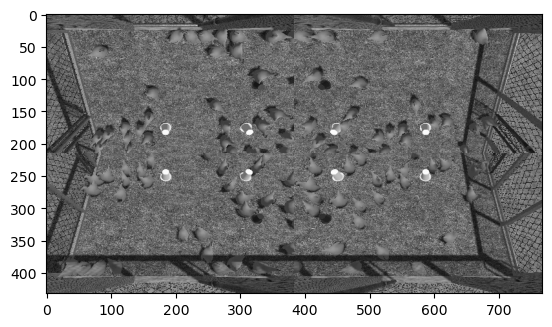

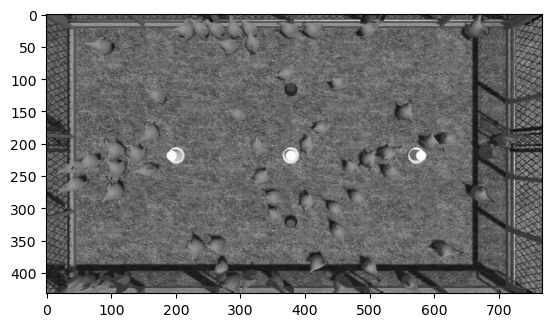

In [66]:
# get first sample and unpack
first_data = dataset[0]
features, labels = first_data
print(features, labels)
plt.imshow(features[0,:,:])
plt.show()
plt.imshow(labels[0,:,:])
plt.show()

In [182]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        
        # N, 1, 28, 28
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 11, stride=3, padding=1), # -> N, 16, 30, 30 (60, 60)
            nn.ReLU(),
            nn.Conv2d(16, 32, 11, stride=3, padding=1), # -> N, 32, 15, 15 (14, 16)
            nn.ReLU(),
            nn.Conv2d(32, 64, 4) # -> N, 64, 1, 1
        )
        
        self.FCN = nn.Sequential(
            nn.Linear(42*79, 400), # (N, 784) -> (N, 128) #768
            nn.ReLU(),
#            nn.Linear(400, 400),
#            nn.ReLU(),
#            nn.Linear(400, 400),
#            nn.ReLU(),
            nn.Linear(400, 42*79) # -> N, 3
        )
        
        # N , 64, 1, 1
        #Output_size=(Input_size−1)×stride−2×padding+kernel_size+output_padding
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 4, stride=(1,1)), # 
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, (11,11), stride=(3,3), padding=(1,1), output_padding=(1,1)), # N, 16, 14, 14 (N,16,13,13 without output_padding)
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, (11,11), stride=(3,3), padding=(1,0), output_padding=(0,1)), # N, 1, 28, 28  (N,1,27,27)
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
#        print(encoded.shape)
#        flattened = torch.flatten(encoded)
            #print(flattened.shape)
#        fcn_x = self.FCN(flattened)
            #unflattener = torch.unflatten(0, (64, 2, 6))
            #unflatten = torch.nn.Unflatten(0, (14,14))
#        unflattened = torch.unflatten(fcn_x, 0, (1, 64, 42, 79))
            #print(unflattened.shape)
        decoded = self.decoder(encoded)
#        decoded = self.decoder(unflattened)

#        print(decoded.shape)
        return decoded
    
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3, 
                             weight_decay=1e-5)

In [ ]:
        # N , 64, 1, 1
        #Output_size=(Input_size−1)×stride−2×padding+kernel_size+output_padding
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 4, stride=(1,1)), # 
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, (11,5), stride=(3,3), padding=(1,1), output_padding=(0,1)), # N, 16, 14, 14 (N,16,13,13 without output_padding)
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, (11,5), stride=(3,3), padding=(1,0), output_padding=(0,1)), # N, 1, 28, 28  (N,1,27,27)
            nn.Sigmoid()
        )

In [156]:
input_size = 42
stride = 1
padding=0
kernel_size=4
output_padding=0
layer_1 = (input_size-1)*stride-2*padding+kernel_size+output_padding
print(layer_1)
stride = 3
padding=1
kernel_size=11
output_padding=0
layer_2 = (layer_1-1)*stride-2*padding+kernel_size+output_padding
print(layer_2)
stride = 3
padding=1
kernel_size=11
output_padding=0
layer_3 = (layer_2-1)*stride-2*padding+kernel_size+output_padding
print(layer_3)
432

45
141
429


432

In [162]:
#Output_size=(Input_size−1)×stride−2×padding+kernel_size+output_padding
# Need 432, 768
input_size = 79
stride = 1
padding=0
kernel_size=4
output_padding=0
layer_1 = (input_size-1)*stride-2*padding+kernel_size+output_padding
print(layer_1)
stride = 3
padding=1
kernel_size=11
output_padding=1
layer_2 = (layer_1-1)*stride-2*padding+kernel_size+output_padding
print(layer_2)
stride = 3
padding=0
kernel_size=11
output_padding=1
layer_3 = (layer_2-1)*stride-2*padding+kernel_size+output_padding
print(layer_3)

82
253
768


In [183]:
import time
# Point to training loop video
num_epochs = 1
outputs = []

for epoch in range(num_epochs):
    start = time.perf_counter()
    for (img, target) in data_loader:
        #img = img.reshape(-1, 28*28) # -> use for Autoencoder_Linear
        recon = model(img)
        loss = criterion(recon, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    end = time.perf_counter()
    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}, Time:{end-start:.4f}')
    outputs.append((epoch, img, recon))

# 432, 768

Epoch:1, Loss:0.0197, Time:0.1040


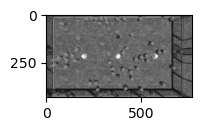

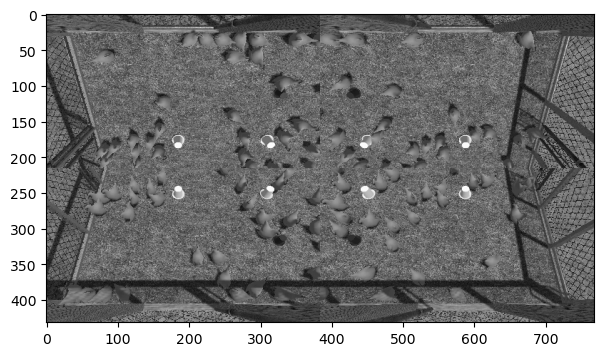

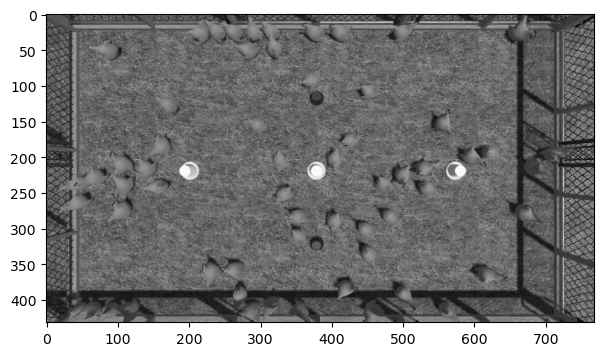

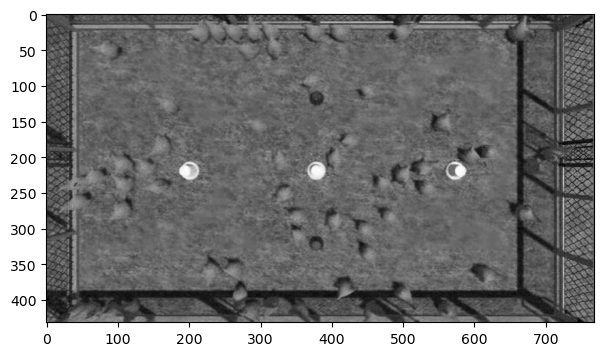

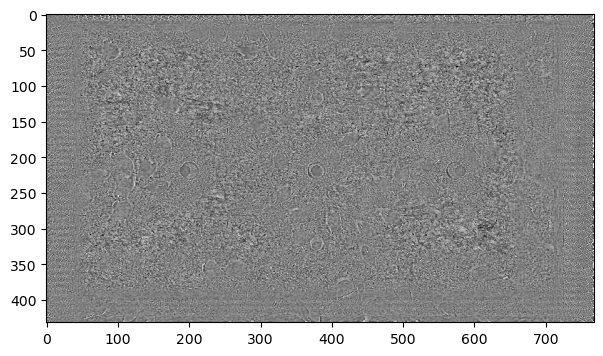

In [176]:
recon = outputs[num_epochs-1][2].detach().numpy()

for i, item in enumerate(recon):
    if i >= 3: break
    plt.subplot(2, 3, 3+i+1) # row_length + i + 1
    #item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
    # item: 1, 28, 28
    plt.imshow(item[0])
plt.show()
    
plt.figure(figsize=(16, 4))
plt.imshow(cams[0,0,:,:])
plt.show()
plt.figure(figsize=(16, 4))
plt.imshow(top[0,0,:,:])
plt.show()
plt.figure(figsize=(16, 4))
plt.imshow(item[0])
plt.show()


pred = item[0]
targ = top[0,0,:,:]
targ = targ.numpy()

plt.figure(figsize=(16, 4))
plt.imshow(pred - targ, vmin = -0.2, vmax = 0.2)
#plt.colorbar()
plt.show()

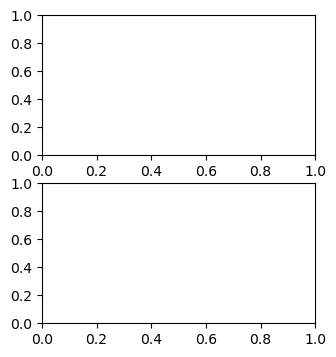

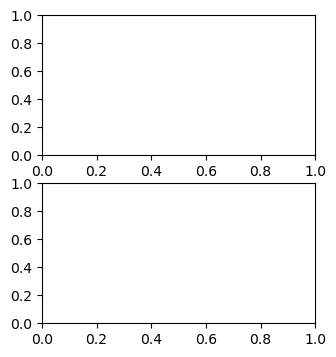

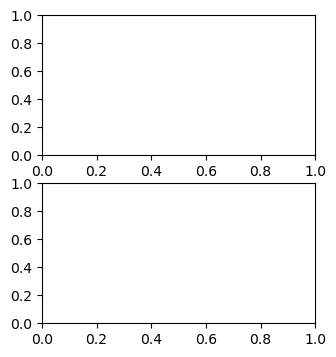

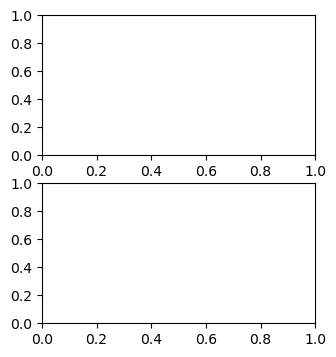

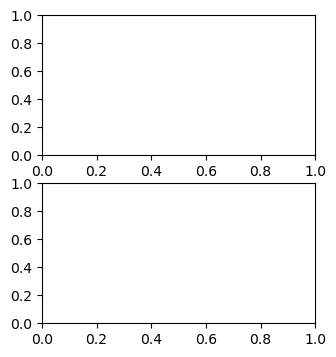

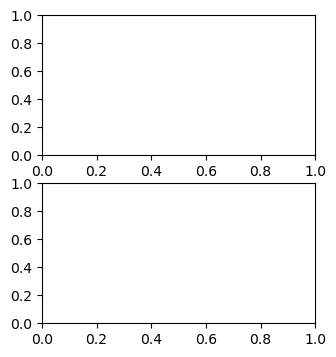

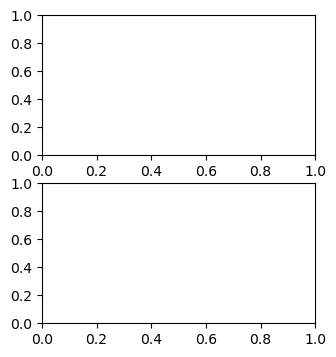

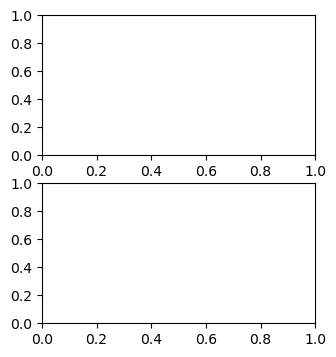

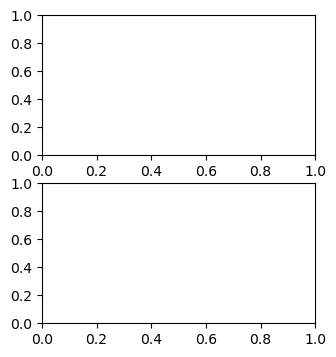

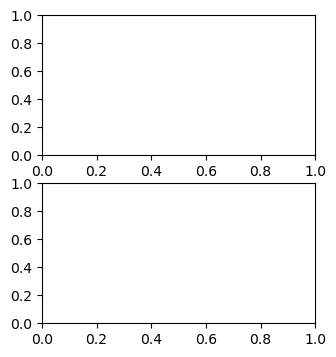

In [74]:
for k in range(0, num_epochs, 500):
    plt.figure(figsize=(12, 4))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 3: break
        plt.subplot(2, 3, i+1)
        #item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 3: break
        plt.subplot(2, 3, 3+i+1) # row_length + i + 1
        #item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

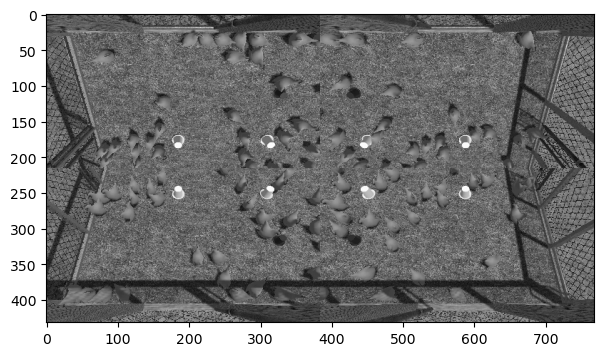

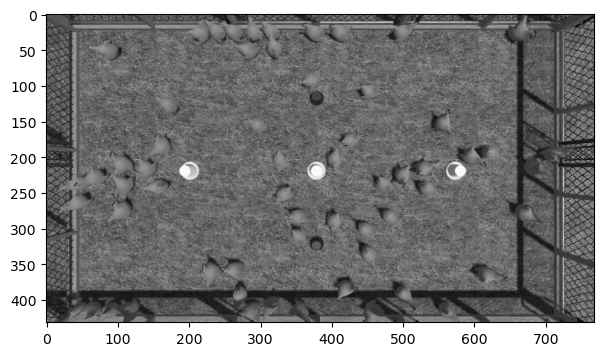

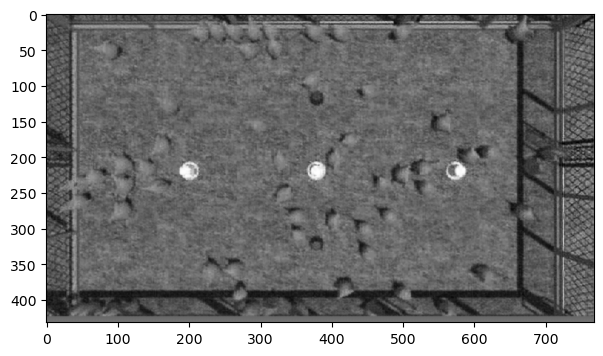

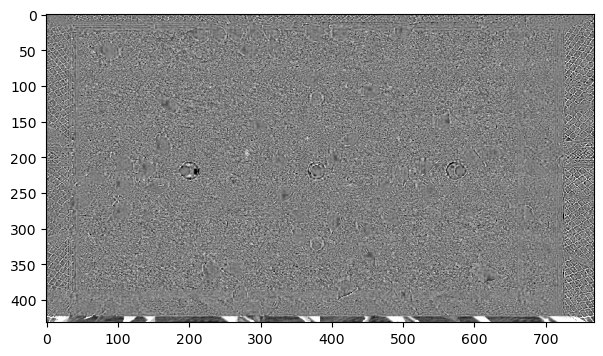

In [75]:
plt.figure(figsize=(16, 4))
plt.imshow(cams[0,0,:,:])
plt.show()
plt.figure(figsize=(16, 4))
plt.imshow(top[0,0,:,:])
plt.show()
plt.figure(figsize=(16, 4))
plt.imshow(item[0])
plt.show()


pred = item[0]
targ = top[0,0,:,:]
targ = targ.numpy()

plt.figure(figsize=(16, 4))
plt.imshow(pred - targ, vmin = -0.2, vmax = 0.2)
#plt.colorbar()
plt.show()


In [12]:
for k in range(0, num_epochs, 25):
    plt.figure(figsize=(12, 4))
    plt.gray()
    imgs = outputs_t[k][1].detach().numpy()
    recon = outputs_t[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 3: break
        plt.subplot(2, 3, i+1)
        #item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 3: break
        plt.subplot(2, 3, 3+i+1) # row_length + i + 1
        #item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

NameError: name 'outputs_t' is not defined

<Figure size 1200x400 with 0 Axes>